## Basics of Cluster Analysis

### Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the Data

In [4]:
data = pd.read_csv('3.01. Country clusters.csv')

In [5]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


So, we have Country, Latitude, Longitude, and Language. The latitude and longitude correspond to the geographic centers of the countries, which is one way to represent location. 

This dataset gives us the decimal degrees of the geographical location for respective countries, which are the converted latitudes and longitudes of the countries. This is done using a geographic decimal converter which can be found online. 

Note: North and East are positive, while South and West are negative. So, USA center would be 44.97 decimal degrees NorthEast and -103.77 decimal degrees SouthWest.

So, now we have the decimal degrees of the geographic centers of the countries in the sample. In the USA, the location is somewhere in South Dakota, which is not optimal because the choice of South Dakota was biased by Alaska and Hawaii. However, this won't matter to much when it comes to clustering. 

Now, lets plot the data. If we want our data to resemble a map, we must set the axes to reflect the natural domain of latitude and longitude.

<function matplotlib.pyplot.show(close=None, block=None)>

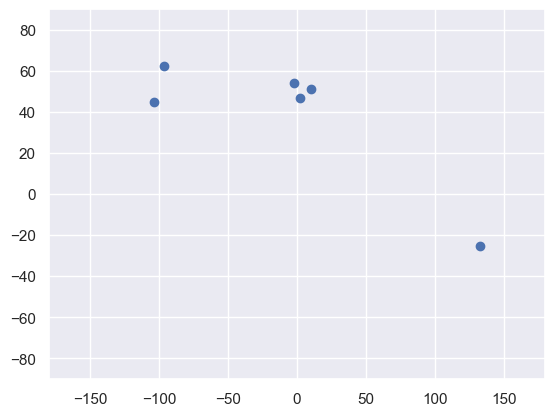

In [7]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

Compared to an actual map of the world, you will see that this methodology is not bad at all. The lowest point it Australia, the left two are USA and Canada, and the middle 3 are France, Germany, and UK.

Now, let's do some clustering:

### Select the Features

Our inputs will be contained in a variable, x. We will start by clustering based on location, so we want x to contain the latitude and longitude. 

We will use the pandas method, DataFrame.iloc(row indices to keep, column indices to keep), which slices the data frame, given rows and columns to be kept. 

We want to keep all rows so we put [:] as the first argument to keep all rows. Remember that Pandas indeces start from 0, so if we want latitude and longitude it is columns 1 and 2. The appropriate argument for this is [1:3], which will slice the first and second columns out of the dataframe. Then, print x to see the result:

In [11]:
x = data.iloc[:,1:3]

In [12]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


This is exactly as we wanted it. 

### Clustering

Next, let's declare a variable called kmeans, which equals the KMeans Sklearn method - remember K and M are capitalized:

In [22]:
kmeans = KMeans(2)

The value in brackets is the number of clusters we want to produce, so 2. 

So, our variable 'kmeans' is now an object, which we will use for the clustering itself. 

Similar to what we've seen in regressions, the clustering itself happens using the .fit() method:

In [25]:
kmeans.fit(x)

KMeans(n_clusters=2)

This line of code will apply k-means clustering with 2 clusters to x. The output indicates that the clustering has been completed. 

### Clustering Results

Usually though, we don't need to just perform the clustering, but are interested in the clusters themselves. 

We can obtain the predicted clusters for each observation using the sklearn.cluster.KMeans.fit_predict(x) method, which returns the cluster predictions in an array.

So, let's create a new variable called identified_clusters equal to the kmeans method above:

In [30]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

The result is an array containing the predicted clusters. 

We see that there are two clusters indicated by 0 and 1. We can clearly see that the first five observations are in the same cluster, 0, while the last one is in cluster 1. 

Now, let's create a datframe so we can see things more clearly. We'll also add an additional column to it called 'Cluster' equal to identified_clusters: 

In [33]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


As you can see, we have our table with the countries, latitude, longitude, language, but also the cluster they belong to. 

We can see that the USA, Canada, France, UK, and Germany are in cluster 0, while Australia is in cluser 1. 

Finally, let's plot all this on a scatter plot - in order for this to resemble a map of the world the y-axis will be longitude, while the x-axis, latitude: 

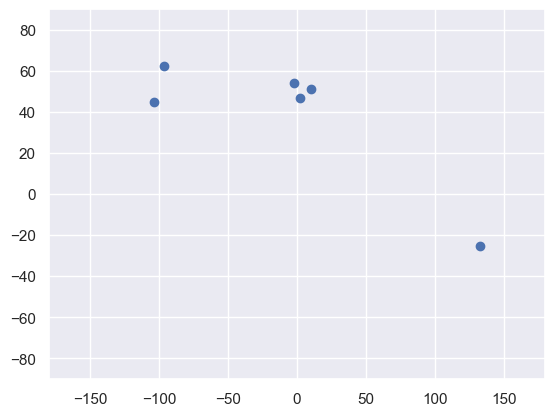

In [36]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

We see that this is the same graph as before. 

So, let's use our first trick - in matplotlib, we can set the color to be determined by a variable. In our case that will be 'Cluster', so let's add c=data_with_clusters['Cluster'] to our graph, which indicates that we want to have as many colors for the points as there are clusters.

The colors are not so pretty right now, so we will set the colors to 'rainbow' by specifying cmap='rainbow' in the code:

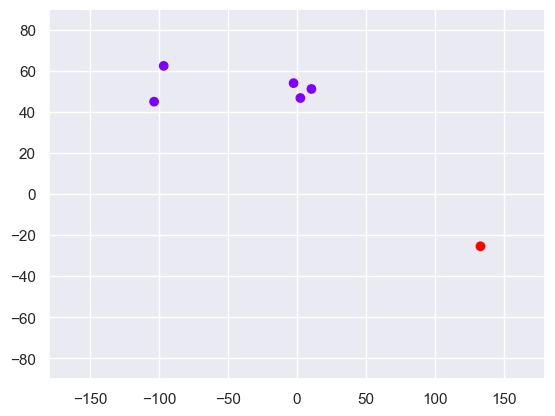

In [39]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

We can see the two clusters, one is purple and the other is red. This is how we perform k-means clustering!

But, what if we wanted to have three clusters? 

We simply go back to the line where we specified the number of clusters (i.e. kmeans = KMeans(3)) and just change it to 3. Run all the cells and it changes to 3 clusters (0,1, and 2). 

In [42]:
kmeans = KMeans(3)

In [44]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [46]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [48]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


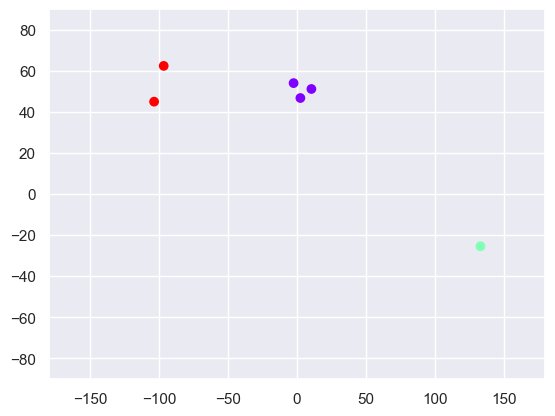

In [50]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

From the dataframe we can see that USA and Canada are in the same cluster, while France, UK, and Germany in another, with Australia still by itself. 

We also now have 3 different colors representing the different clusters.

## Clustering Categorical Data

In [54]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


As we can see, there is one other piece of information that we did not use - Language. 

In order to make use of it, we must first encode it in some way. The simplest way to do that is by using numbers - we'll create a new variable called data_mapped:

### Map the Data

In [58]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


Note: This is NOT the optimal way to encode these variables, but it will work for now.

### Select the Features

Now, we will choose the features we want to use for clustering. We can actually use a single feature for clustering:

In [63]:
x = data_mapped.iloc[:,3:4]

Here, we are basically slicing all rows, but only the last column. So we are left with:

In [66]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


Now, we can perform clustering. 

### Clustering

In [70]:
kmeans = KMeans(3)

In [72]:
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering Results

In [75]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 1, 2, 1], dtype=int32)

In [77]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


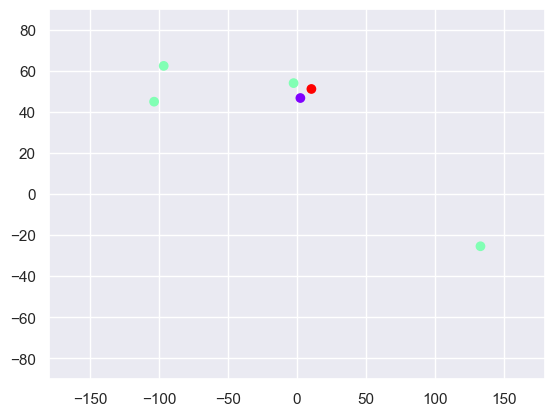

In [79]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

The three clusters are USA, Canada, UK, and Australia in the first one. France in the second. Germany in the third.

This is what we expected - English, French, and German. 

By the way, we are still using Longitude and Latitude as axes of the plot. Unlike regression, when doing clustering, you can plot the data as you wish. The cluster information is contained in the data_with_clusters['Cluster'] column in the dataframe, and is the color of the points on the plot. 

So, can we use both numerical and categorical data in clustering? Yes!

Let's go back to our input data, x, and take the last 3 series instead of just one:

In [82]:
x = data_mapped.iloc[:,1:4]

In [84]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [86]:
kmeans = KMeans(3)

In [88]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [90]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [92]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


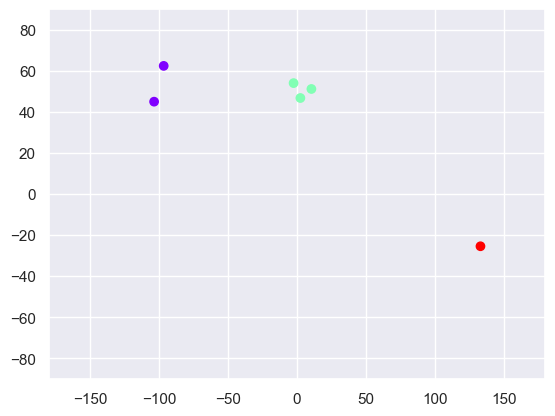

In [94]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

This time, the three clusters turned out to be based simply on geographical location, instead of language and location. 

So, what if we used two clusters? 

In [115]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [117]:
kmeans = KMeans(2)

In [119]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [121]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [123]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


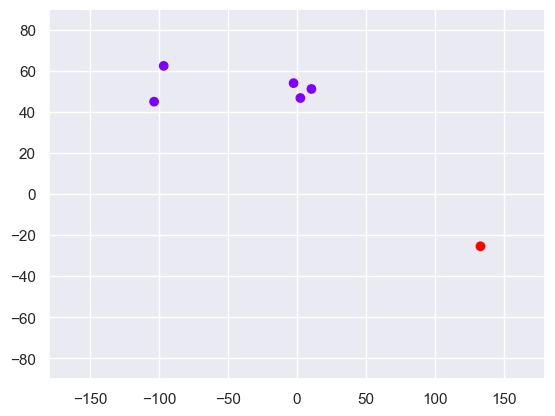

In [125]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

We have also seen this solution before as well. 

So, now we will have to figure out what is going on with this clustering with Location and Language.

## Selecting the number of Clusters

### WCSS

In [132]:
kmeans.inertia_

13208.958119999996

This is how you calculate the 'within-cluster sum of squares'. 

To plot the elbow to find the right number of clusters, we actually need to solve the problem for 1,2,3, and so on clusters and calculate WCSS for each of them. 

We can do that with a loop - first, we'll declare an empty list called 'wcss':

In [135]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Explanation of the code:

For i in range(1,7):  because we have a total of 6 observations

kmeans = KMeans(i) - is just creating the kmeans clustering for the range

kmeans.fit(x) - we want to fit the input data, x, using k-means

wcss_iter = kmeans.inertia_ - we will calculate the WCSS for the iteration (i) using the inertia method.

wcss.append(wcss_iter) - finally, we will add the WCSS for the iteration to the WCSS list. A handy method to do this is the list.append(x) method which appends a new item with value x to the end of the oject(i.e. list, array, etc.)

In [139]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

WCSS should be a list which contains the 'within-cluster sum of squares' for one cluster, two clusters, and so on until six. 

So, the first number in the list is the WCSS for 1 cluster, second number is 2 clusters, and so on. 

As you can see, the sequence is decreasing for each additional cluster, with very big leaps in the first two steps (i.e. 42605 to 13208), and much smaller ones later on. 

Finally, when each point is a separate cluster, we have a WCSS equal to 0. 

### The Elbow Method

Now, let's plot this - we have WCSS, so let's declare a variable called, number_clusters, which is also the list from 1 to 6:

In [145]:
number_clusters = range(1,7)

Then, using some conventional plotting code, we get the graph:

Text(0, 0.5, 'Within-cluster Sum of Squares')

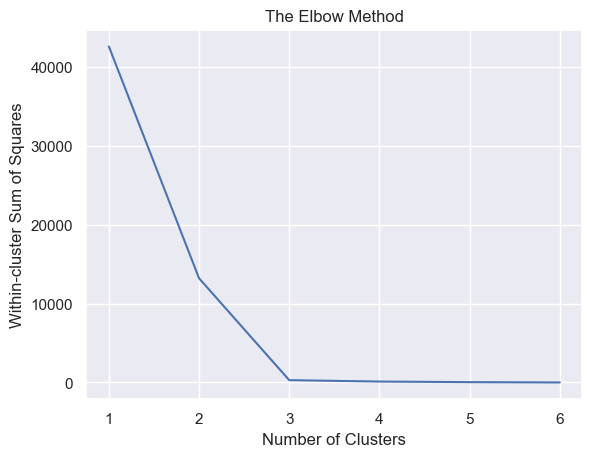

In [148]:
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

Finally, we will use the elbow method to decide the optimal number of clusters. 

There are two points which can be the elbow: (2 clusters or 3 clusters)

A 3 cluster solution is definitely the better one, as after it, there is not much to gain. 

A 2 cluster solution would be suboptimal, as the leap from 2 to 3 is very big in terms of WCSS ~ 14000. 